<a href="https://colab.research.google.com/github/Amit98660/Online-Auctions-For-Second-Hand-Items-with-Price-Prediction/blob/main/Ipl_winning_team_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here, I am going to predict  the coming year(2024)
IPl team winner by looking at the past dataset of each team played with others.**

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Data Understanding


*   Data ingestion
*   Descriptive stats
*   Data information and so on







In [ ]:
Data_path = "Team vs team.csv"
team_data = pd.read_csv(Data_path)
team_data



,Year,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,2022,Super Kings,KKR,KKR,6 wickets,Wankhede,"Mar 26, 2022",T20
1,2022,Capitals,Mumbai,Capitals,4 wickets,Brabourne,"Mar 27, 2022",T20
2,2022,Punjab Kings,RCB,Punjab Kings,5 wickets,DY Patil,"Mar 27, 2022",T20
3,2022,Titans,Super Giants,Titans,5 wickets,Wankhede,"Mar 28, 2022",T20
4,2022,Sunrisers,Royals,Royals,61 runs,Pune,"Mar 29, 2022",T20
...,...,...,...,...,...,...,...,...
953,2008,RCB,Mumbai,Mumbai,9 wickets,Bengaluru,"May 28, 2008",T20
954,2008,Kings XI,Royals,Kings XI,41 runs,Mohali,"May 28, 2008",T20
955,2008,Daredevils,Royals,Royals,105 runs,Wankhede,"May 30, 2008",T20
956,2008,Super Kings,Kings XI,Super Kings,9 wickets,Wankhede,"May 31, 2008",T20


Top 5 datasets


In [ ]:
team_data.head()

,Year,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,2022,Super Kings,KKR,KKR,6 wickets,Wankhede,"Mar 26, 2022",T20
1,2022,Capitals,Mumbai,Capitals,4 wickets,Brabourne,"Mar 27, 2022",T20
2,2022,Punjab Kings,RCB,Punjab Kings,5 wickets,DY Patil,"Mar 27, 2022",T20
3,2022,Titans,Super Giants,Titans,5 wickets,Wankhede,"Mar 28, 2022",T20
4,2022,Sunrisers,Royals,Royals,61 runs,Pune,"Mar 29, 2022",T20


In [ ]:
column_names = ['Year', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date', 'Scorecard']
team_data = pd.read_csv(Data_path)
team_data.columns = column_names
team_data.head()

,Year,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,2022,Super Kings,KKR,KKR,6 wickets,Wankhede,"Mar 26, 2022",T20
1,2022,Capitals,Mumbai,Capitals,4 wickets,Brabourne,"Mar 27, 2022",T20
2,2022,Punjab Kings,RCB,Punjab Kings,5 wickets,DY Patil,"Mar 27, 2022",T20
3,2022,Titans,Super Giants,Titans,5 wickets,Wankhede,"Mar 28, 2022",T20
4,2022,Sunrisers,Royals,Royals,61 runs,Pune,"Mar 29, 2022",T20


Checking just how many columns are included

In [ ]:
  team_data.columns

Index(['Year', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date',
       'Scorecard'],
      dtype='object')

Checking Datatypes

In [ ]:
team_data.dtypes

Year           int64
Team 1        object
Team 2        object
Winner        object
Margin        object
Ground        object
Match Date    object
Scorecard     object
dtype: object

Checking Information

In [ ]:
team_data.info

<bound method DataFrame.info of      Year        Team 1        Team 2        Winner     Margin     Ground  \
0    2022   Super Kings           KKR           KKR  6 wickets   Wankhede   
1    2022      Capitals        Mumbai      Capitals  4 wickets  Brabourne   
2    2022  Punjab Kings           RCB  Punjab Kings  5 wickets   DY Patil   
3    2022        Titans  Super Giants        Titans  5 wickets   Wankhede   
4    2022     Sunrisers        Royals        Royals    61 runs       Pune   
..    ...           ...           ...           ...        ...        ...   
953  2008           RCB        Mumbai        Mumbai  9 wickets  Bengaluru   
954  2008      Kings XI        Royals      Kings XI    41 runs     Mohali   
955  2008    Daredevils        Royals        Royals   105 runs   Wankhede   
956  2008   Super Kings      Kings XI   Super Kings  9 wickets   Wankhede   
957  2008   Super Kings        Royals        Royals  3 wickets   DY Patil   

       Match Date Scorecard  
0    Mar 26, 

Descriptive stats


In [ ]:
team_data.describe()

,Year
count,958.000000
mean,2014.973904
std,4.316664
min,2008.000000
25%,2011.000000
50%,2015.000000
75%,2019.000000
max,2022.000000


In [ ]:
team_data.describe(exclude=['int','float'])


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
count,958,958,958,932,958,958,958
unique,18,18,21,104,33,708,1
top,Super Kings,Mumbai,Mumbai,6 wickets,Wankhede,"May 5, 2019",T20
freq,119,122,129,104,104,2,958


In [ ]:
team_data.drop_duplicates


<bound method DataFrame.drop_duplicates of      Year        Team 1        Team 2        Winner     Margin     Ground  \
0    2022   Super Kings           KKR           KKR  6 wickets   Wankhede   
1    2022      Capitals        Mumbai      Capitals  4 wickets  Brabourne   
2    2022  Punjab Kings           RCB  Punjab Kings  5 wickets   DY Patil   
3    2022        Titans  Super Giants        Titans  5 wickets   Wankhede   
4    2022     Sunrisers        Royals        Royals    61 runs       Pune   
..    ...           ...           ...           ...        ...        ...   
953  2008           RCB        Mumbai        Mumbai  9 wickets  Bengaluru   
954  2008      Kings XI        Royals      Kings XI    41 runs     Mohali   
955  2008    Daredevils        Royals        Royals   105 runs   Wankhede   
956  2008   Super Kings      Kings XI   Super Kings  9 wickets   Wankhede   
957  2008   Super Kings        Royals        Royals  3 wickets   DY Patil   

       Match Date Scorecard  
0 

In [ ]:
team_data.isnull()

,Year,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
953,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False
955,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False


In [ ]:
team_data.isnull().sum()

Year           0
Team 1         0
Team 2         0
Winner         0
Margin        26
Ground         0
Match Date     0
Scorecard      0
dtype: int64

In [ ]:
team_data['Margin'].value_counts()

6 wickets    104
7 wickets    102
5 wickets     90
8 wickets     69
4 wickets     49
            ... 
118 runs       1
146 runs       1
51 runs        1
64 runs        1
105 runs       1
Name: Margin, Length: 104, dtype: int64

In [ ]:
team_data.dropna()





,Year,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,2022,Super Kings,KKR,KKR,6 wickets,Wankhede,"Mar 26, 2022",T20
1,2022,Capitals,Mumbai,Capitals,4 wickets,Brabourne,"Mar 27, 2022",T20
2,2022,Punjab Kings,RCB,Punjab Kings,5 wickets,DY Patil,"Mar 27, 2022",T20
3,2022,Titans,Super Giants,Titans,5 wickets,Wankhede,"Mar 28, 2022",T20
4,2022,Sunrisers,Royals,Royals,61 runs,Pune,"Mar 29, 2022",T20
...,...,...,...,...,...,...,...,...
953,2008,RCB,Mumbai,Mumbai,9 wickets,Bengaluru,"May 28, 2008",T20
954,2008,Kings XI,Royals,Kings XI,41 runs,Mohali,"May 28, 2008",T20
955,2008,Daredevils,Royals,Royals,105 runs,Wankhede,"May 30, 2008",T20
956,2008,Super Kings,Kings XI,Super Kings,9 wickets,Wankhede,"May 31, 2008",T20


In [ ]:
team_data['Margin'].isnull().sum()

0

In [ ]:

mean_team = team_data['Margin'].mode()

team_data['Margin'].fillna(mean_team, inplace=True)

# df_hr.fillna({'Margin': mean_team})

team_data['Margin'].isnull().sum()

0

# Exploratory Data Analysis
Visualize data distribution using pairplot



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

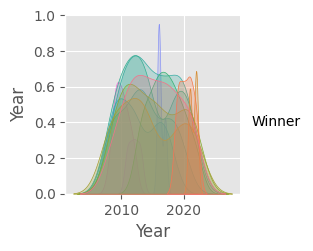

In [ ]:
sns.pairplot(team_data, hue ='Winner')

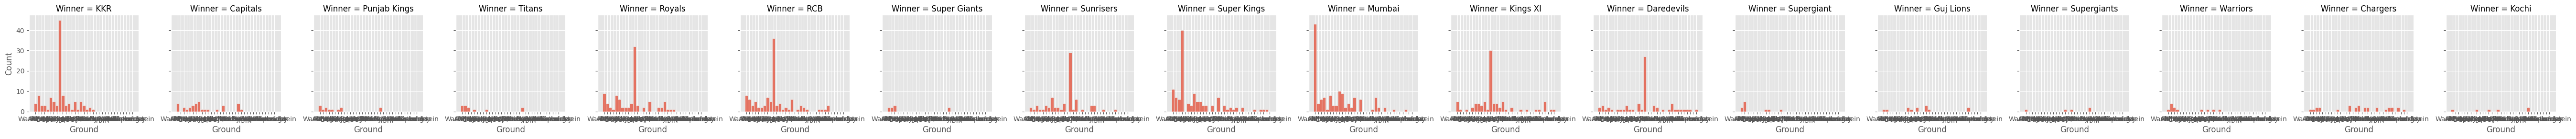

In [ ]:
g = sns.FacetGrid(team_data, col='Winner')
g.map(sns.histplot, 'Ground')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


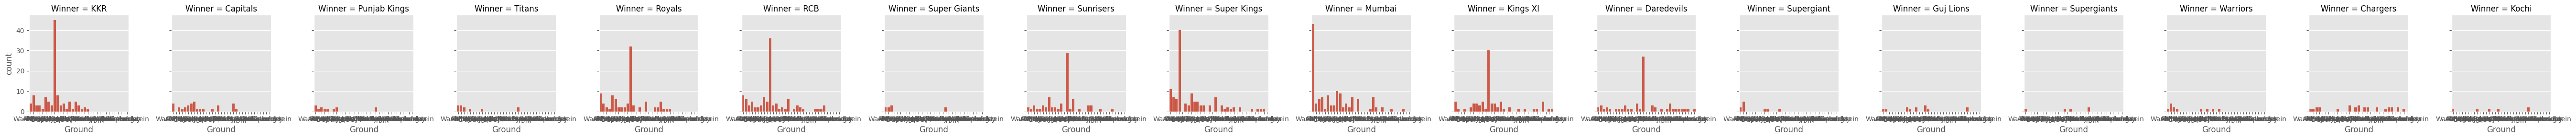

In [ ]:
g = sns.FacetGrid(team_data, col='Winner')
g.map(sns.countplot, 'Ground')
plt.show()